In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
data=pd.read_csv('Country-data.csv')
data.head(25)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [3]:
data.shape

(167, 10)

In [4]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
# No missing values
# converting all the columns which are in percentage to the actual integers
for i in ['exports','health','imports']:
    data[i]=(data[i]*data['gdpp'])/100

In [6]:
data.describe(percentiles=[0.25,0.5,0.75,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


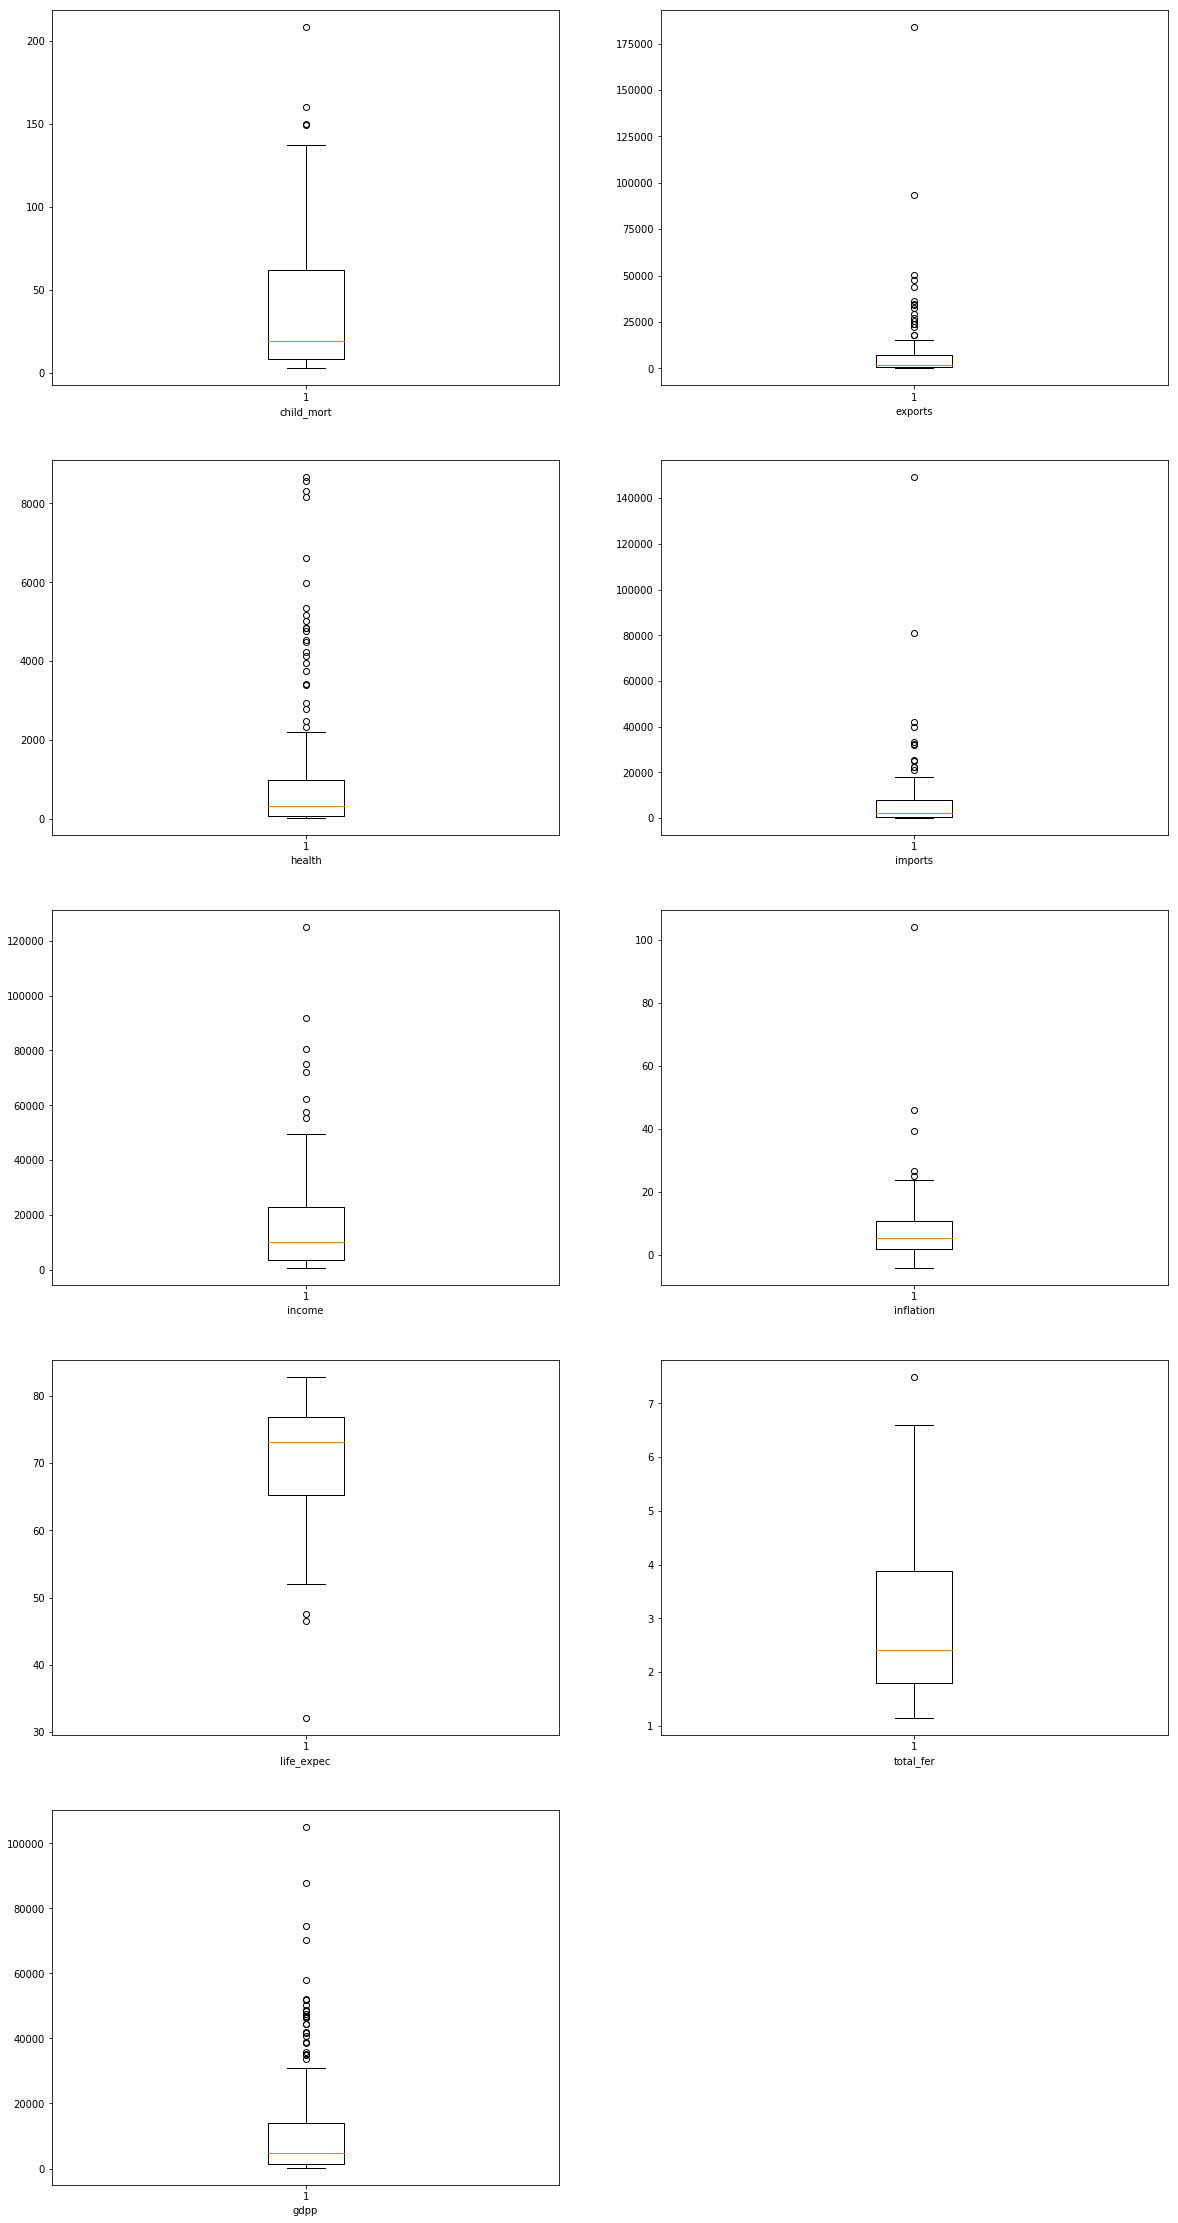

In [7]:
num_vars=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
j=0
plt.figure(figsize=(20,40))
for i in range(1, 10):
    plt.subplot(5, 2, i)
    plt.boxplot(data[num_vars[j]])
    plt.xlabel(num_vars[j])
    j+=1
# plt.show()
    

In [8]:
for i in num_vars:
    Q1=data[i].quantile(0.01)
    Q4=data[i].quantile(0.99)
    data=data[((data[i]>=Q1) & (data[i]<=Q4))]
data.describe(percentiles=[0.25,0.5,0.75,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,33.461364,4598.216027,779.626810,4455.572439,14611.666667,7.334886,71.271212,2.824924,9890.613636
std,32.171565,6755.671351,1240.977698,5983.024584,13539.016177,7.041727,7.036215,1.359965,12315.480268
min,3.000000,55.300000,22.880000,165.244000,1190.000000,-1.430000,54.300000,1.270000,547.000000
25%,10.275000,631.307500,95.258000,945.495000,4462.500000,1.830000,66.200000,1.777500,2092.500000
50%,19.500000,1775.220000,314.068000,2020.150000,9950.000000,5.265000,73.100000,2.395000,4635.000000
75%,50.150000,5519.950000,781.552500,5311.880000,19575.000000,10.675000,76.425000,3.502500,11925.000000
99%,118.070000,30705.720000,5295.068000,29023.294000,53849.000000,26.004000,81.469000,6.208300,49401.000000
max,137.000000,36216.000000,5985.700000,32494.000000,75200.000000,39.200000,81.700000,6.550000,52100.000000


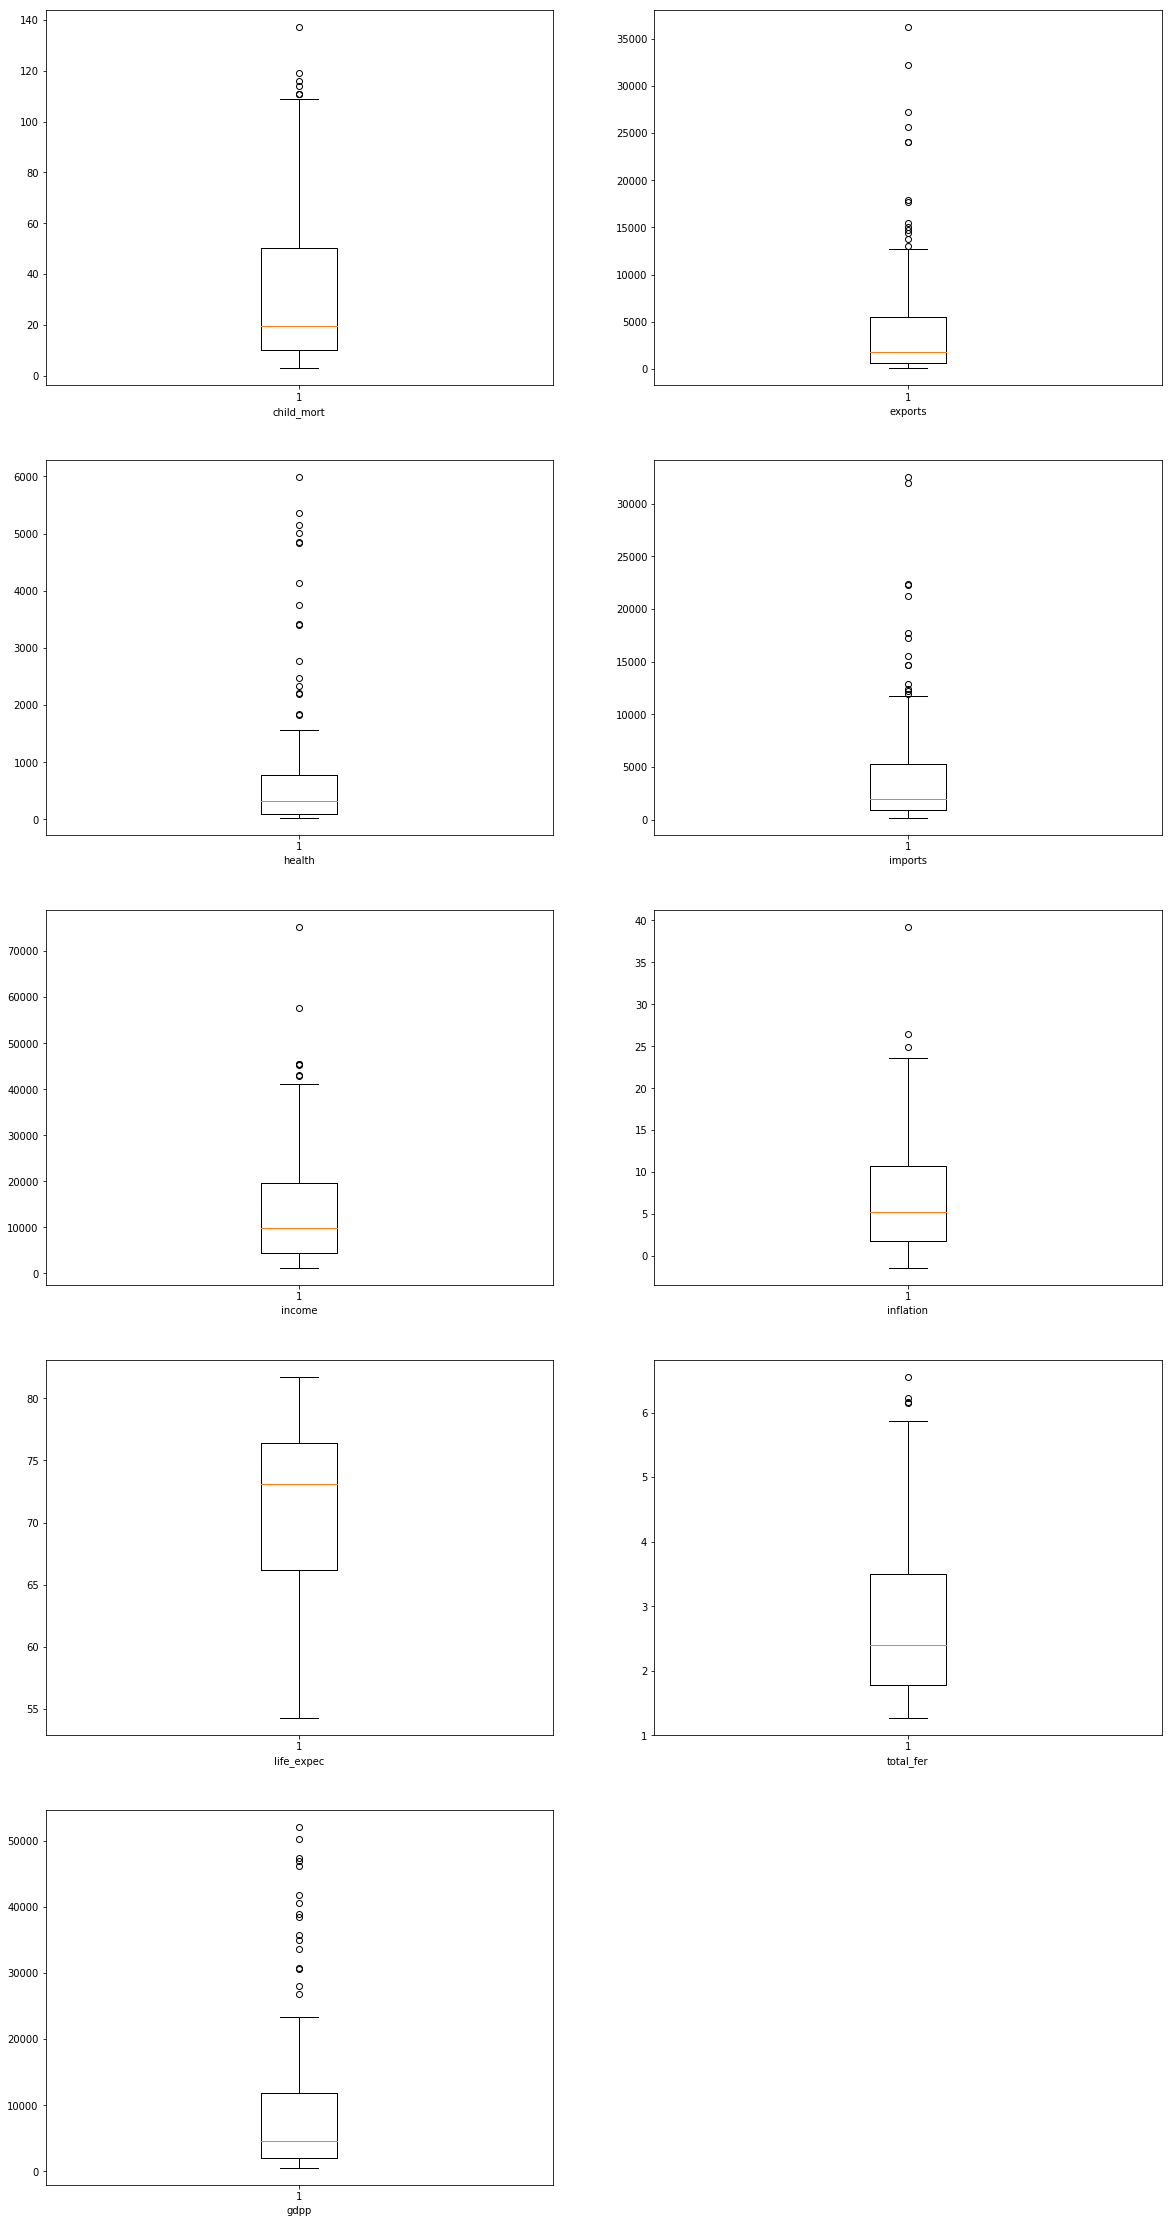

In [9]:
j=0
plt.figure(figsize=(20,40))
for i in range(1, 10):
    plt.subplot(5, 2, i)
    plt.boxplot(data[num_vars[j]])
    plt.xlabel(num_vars[j])
    j+=1

In [10]:
# treating outliers for all but life_expec since many outliers are still present
for i in num_vars:
    if i=='life_expec':
        continue
    else:
        Q1=data['gdpp'].quantile(0.01)
        Q4=data['gdpp'].quantile(0.90)
        data=data[((data['gdpp']>=Q1) & (data['gdpp']<=Q4))]
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,46.808333,809.180083,132.444308,1119.262188,5071.875000,9.409708,67.989583,3.406667,2239.125000
std,30.081236,597.165507,88.812523,688.879313,2464.756391,8.187376,5.077704,1.261894,1054.977032
min,11.200000,79.200000,22.880000,165.244000,1410.000000,0.505000,56.300000,1.270000,758.000000
25%,23.900000,391.362500,66.567250,513.112500,2910.000000,3.770000,64.975000,2.455000,1305.000000
50%,35.850000,654.360000,105.450000,1037.385000,4735.000000,6.975000,68.650000,3.175000,2390.000000
75%,63.000000,1047.592500,182.389000,1546.665000,6715.000000,12.425000,71.725000,4.347500,3057.500000
max,119.000000,2331.740000,406.120000,2539.200000,10400.000000,39.200000,76.900000,6.230000,4140.000000


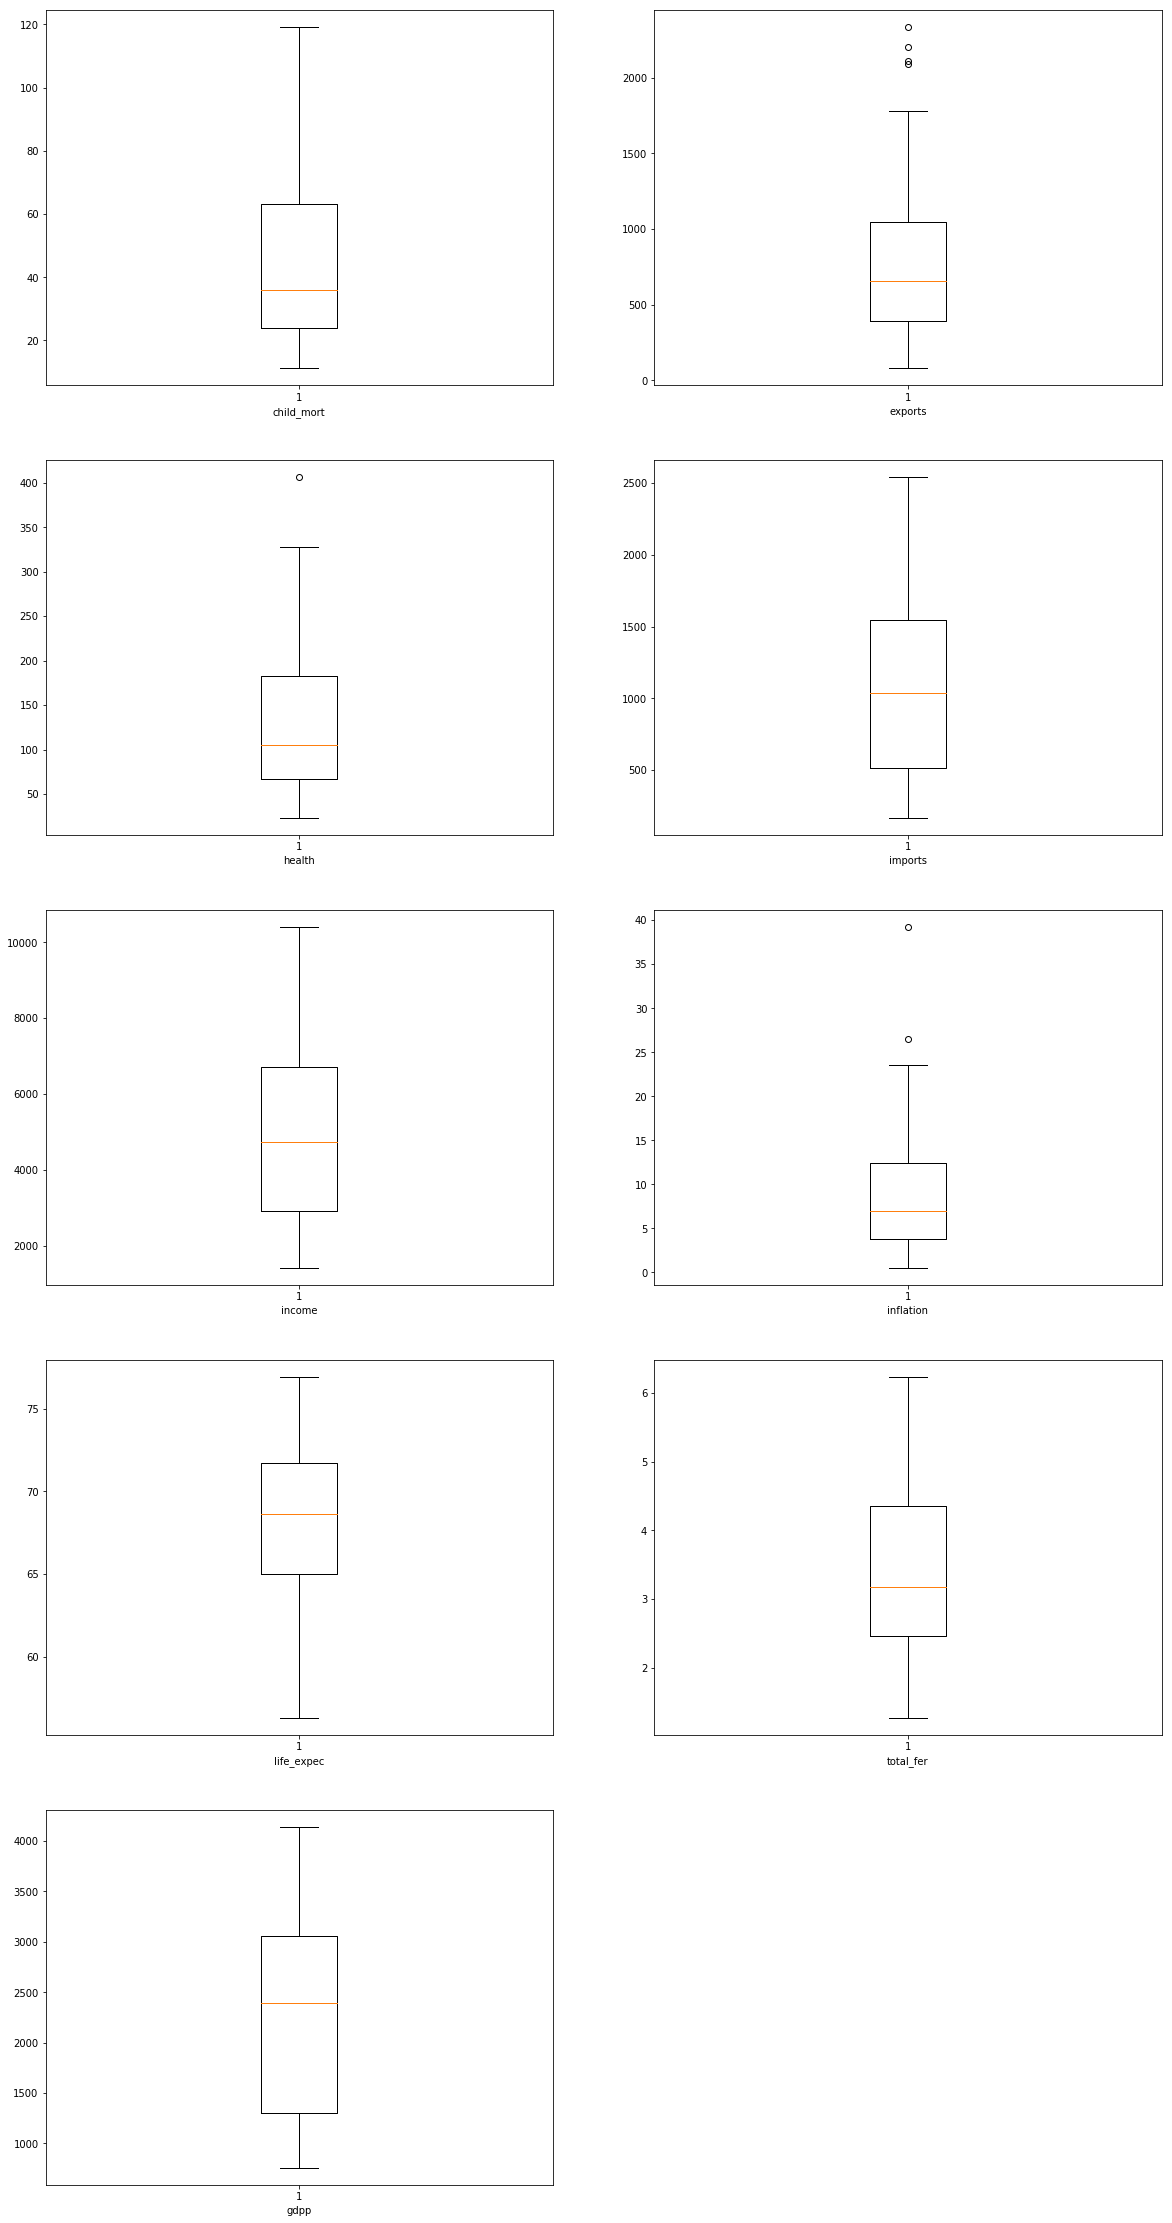

In [11]:
j=0
plt.figure(figsize=(20,40))
for i in range(1, 10):
    plt.subplot(5, 2, i)
    plt.boxplot(data[num_vars[j]])
    plt.xlabel(num_vars[j])
    j+=1

In [12]:
# treating outliers in exports,health, and inflation since many outliers are still present
for i in ['exports','health','inflation']:
    Q1=data[i].quantile(0.01)
    Q4=data[i].quantile(0.90)
    data=data[((data[i]>=Q1) & (data[i]<=Q4))]
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,49.706452,597.584968,102.979187,912.682419,4320.967742,6.859387,67.183871,3.406452,1852.516129
std,29.271453,347.948201,58.307405,571.393361,2149.777283,5.049183,4.821832,1.133168,928.464283
min,17.200000,121.280000,26.681600,165.244000,1410.000000,0.885000,56.300000,1.270000,758.000000
25%,29.150000,345.775000,54.529500,435.335000,2590.000000,2.635000,63.400000,2.530000,1170.000000
50%,37.600000,608.400000,81.171000,718.960000,3980.000000,5.730000,68.500000,3.190000,1380.000000
75%,64.750000,780.020000,151.542500,1248.225000,5720.000000,9.600000,70.900000,4.305000,2830.000000
max,111.000000,1562.560000,223.215000,2404.640000,9860.000000,18.900000,74.100000,5.360000,3550.000000


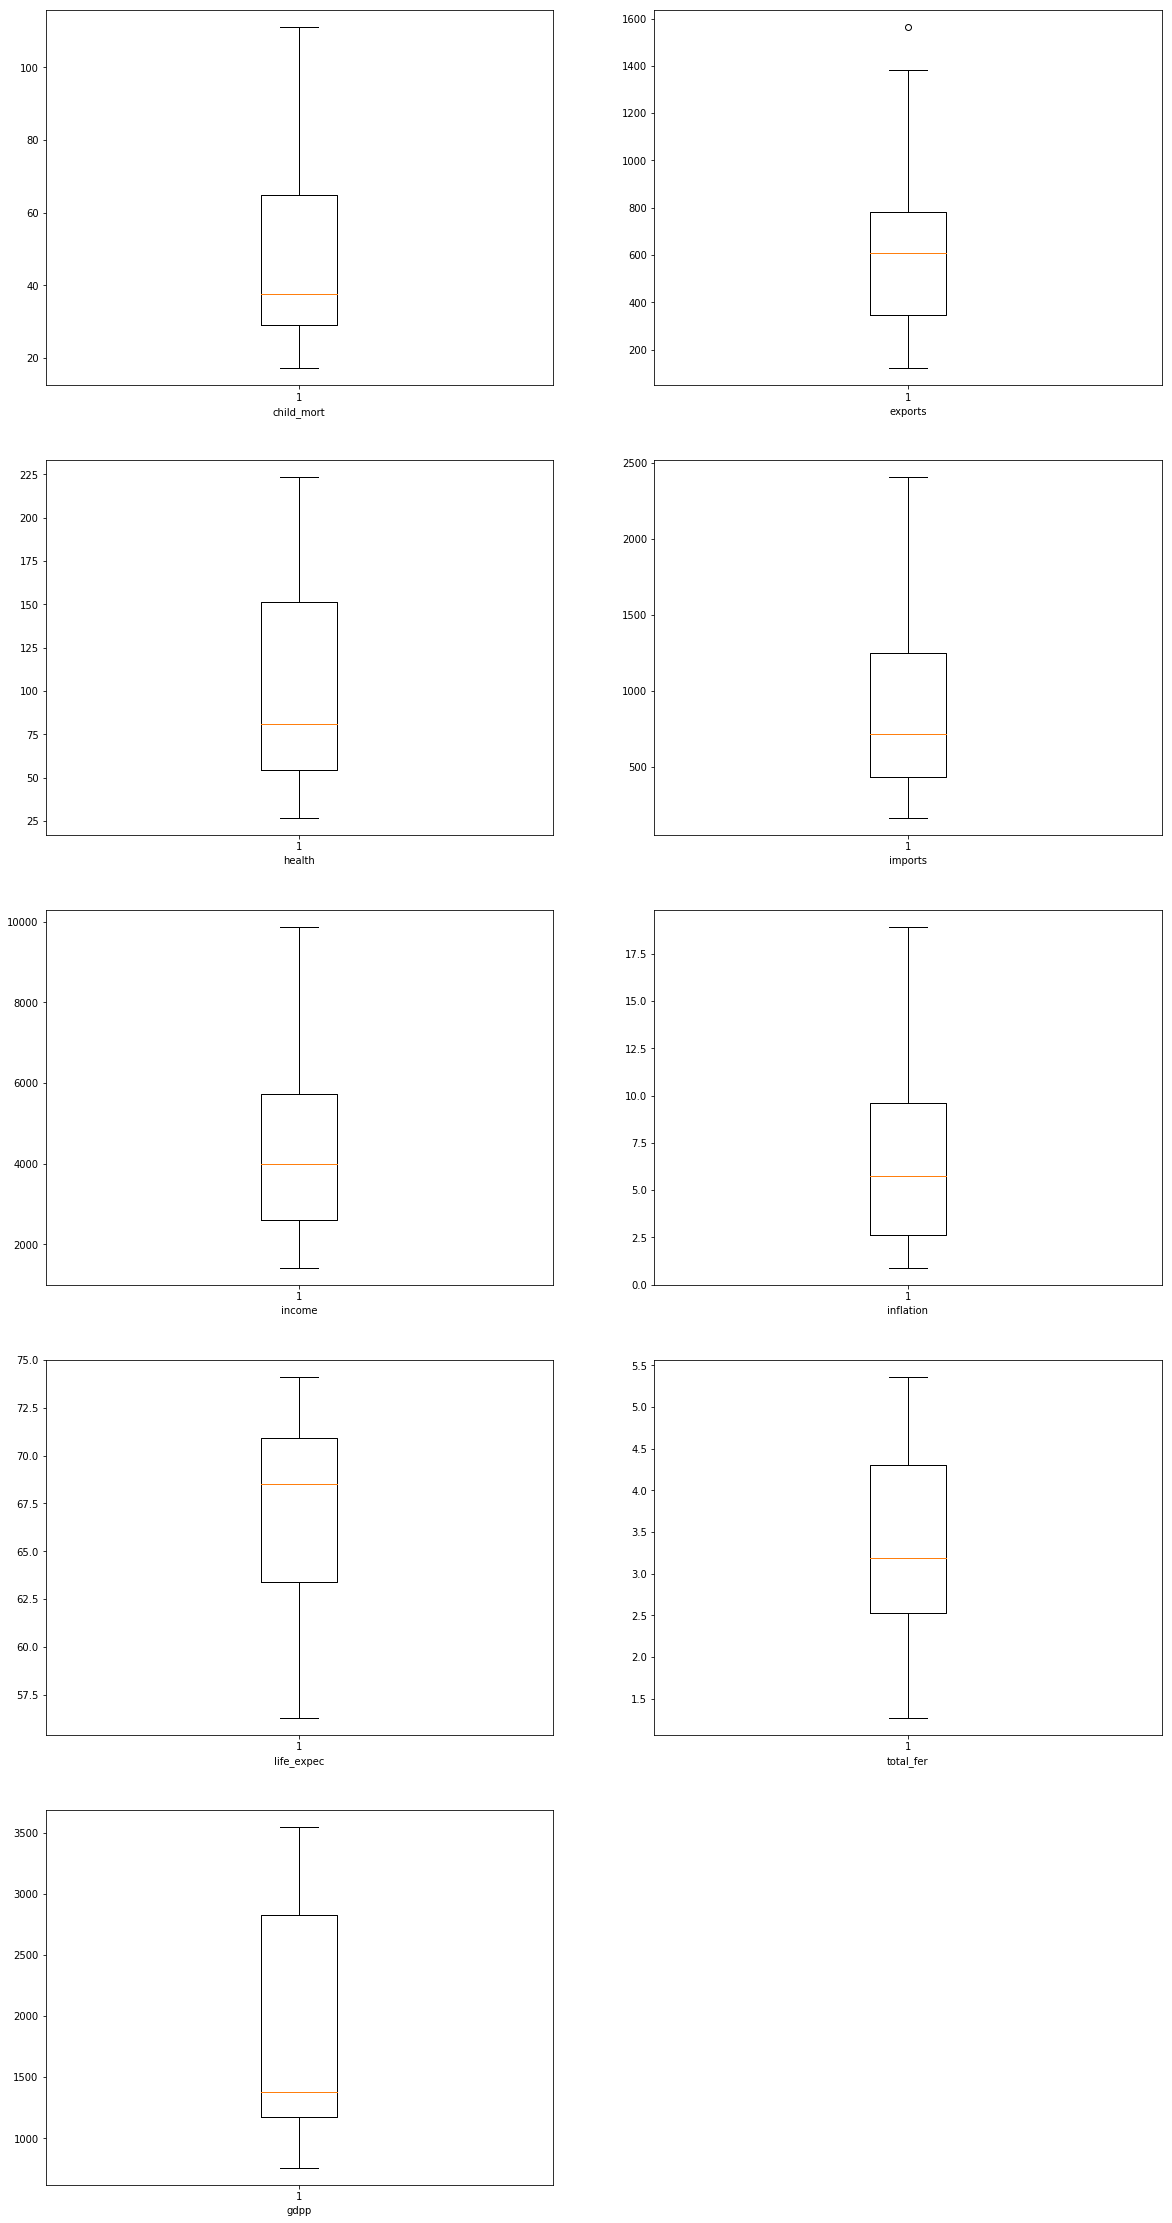

In [13]:
j=0
plt.figure(figsize=(20,40))
for i in range(1, 10):
    plt.subplot(5, 2, i)
    plt.boxplot(data[num_vars[j]])
    plt.xlabel(num_vars[j])
    j+=1

In [14]:
# All the outliers have been cleaned

In [15]:
data.shape

(31, 10)

In [16]:
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Armenia,18.1,669.760,141.6800,1458.660,6700,7.770,73.3,1.69,3220
1,Bangladesh,49.4,121.280,26.6816,165.244,2440,7.140,70.4,2.33,758
2,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
3,Bhutan,42.7,926.500,113.3600,1541.260,6420,5.990,72.1,2.38,2180
4,Bolivia,46.6,815.760,95.8320,679.140,5410,8.780,71.6,3.20,1980
5,Cambodia,44.4,425.226,44.6448,467.670,2520,3.120,66.1,2.88,786
6,Cameroon,108.0,290.820,67.2030,353.700,2660,1.910,57.3,5.11,1310
7,Comoros,88.2,126.885,34.6819,397.573,1410,3.870,65.9,4.75,769
8,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.390,56.3,5.27,1220
9,Egypt,29.1,553.800,121.1600,691.600,9860,10.100,70.5,3.19,2600


In [17]:
#scale the data
mms=MinMaxScaler()
data[num_vars]=mms.fit_transform(data[num_vars])
# data.head(25)

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
data_country=data['country']
data_num_var=data[num_vars]

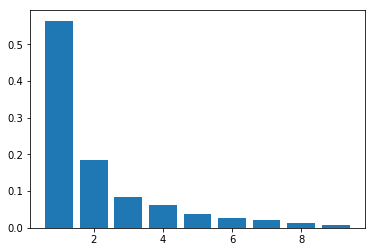

In [19]:
# Perform PCA and plotting the explained variance for each principal component
pca=PCA(random_state=42)
pca.fit(data_num_var)
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

In [20]:
# Explained variance for each principal component
pca.explained_variance_ratio_

array([0.56458194, 0.18416984, 0.08388089, 0.06233246, 0.03754567,
       0.02570791, 0.02158484, 0.0134958 , 0.00670066])

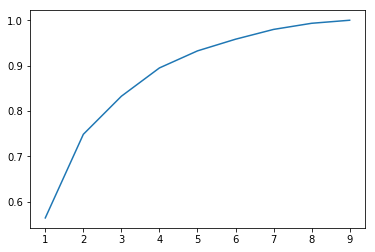

In [21]:
# Plotting the cumulative variance
cum_var=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(cum_var)+1),cum_var)
plt.show()

In [22]:
#Finding the cumulative sum of all components and how much of the variance they explain
cum_var=np.cumsum(pca.explained_variance_ratio_)
cum_var

array([0.56458194, 0.74875177, 0.83263266, 0.89496512, 0.93251079,
       0.9582187 , 0.97980354, 0.99329934, 1.        ])

In [23]:
# Selecting only the first six principal components as six components explain 95% of the variance
pca=PCA(n_components=6,random_state=42)
data_transformed=pca.fit_transform(data_num_var)

In [24]:
data_transform=pd.DataFrame(data_transformed,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
data_transform

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.852587,0.188613,-0.053452,0.113566,-0.026623,-0.075594
1,0.470211,0.511391,-0.414311,0.055953,0.032193,0.031826
2,1.091542,-0.360293,-0.025921,0.220860,0.076032,0.066458
3,-0.494066,0.083628,-0.000140,0.027376,0.218680,0.064749
4,-0.160497,0.213103,0.077168,0.108022,0.099354,0.125238
5,0.415610,0.150524,-0.407721,-0.062516,0.171156,-0.010996
6,0.913497,-0.492076,0.136249,0.148411,0.041003,-0.199760
7,0.875223,-0.093551,-0.137323,0.124483,-0.033939,0.182830
8,0.887182,-0.457081,0.362600,-0.033897,0.131165,-0.144437
9,-0.488711,0.281045,0.218691,0.424787,-0.082969,-0.130652


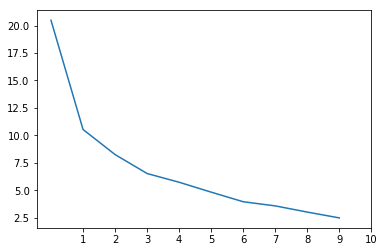

In [25]:
# Using elbow method to find the optimal number of clusters 
ssd=[]
data_elbow=data_transform
range_n_clusters=[1,2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    kmean=KMeans(n_clusters=num_clusters,max_iter=50)
    kmean.fit(data_elbow)
    ssd.append(kmean.inertia_)

plt.plot(ssd)
plt.xticks(range_n_clusters)
plt.show()

In [26]:
# Using silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9]
data_silhouette=data_transform
for num_clusters in range_n_clusters:
    kmean=KMeans(n_clusters=num_clusters,max_iter=50)
    kmean.fit(data_silhouette)
    cluster_label=kmean.labels_
    avg=silhouette_score(data_silhouette,cluster_label)
    print("For n_cluster={0}, the silhouette score is {1}".format(num_clusters,avg))

For n_cluster=2, the silhouette score is 0.3904883919352113
For n_cluster=3, the silhouette score is 0.29958883233793765
For n_cluster=4, the silhouette score is 0.25807806118744087
For n_cluster=5, the silhouette score is 0.2696709625485677
For n_cluster=6, the silhouette score is 0.3054933352682378
For n_cluster=7, the silhouette score is 0.26901187020666606
For n_cluster=8, the silhouette score is 0.31997545035843583
For n_cluster=9, the silhouette score is 0.3511133783551688


In [27]:
# Number of clusters = 2 has the highest score but as per business, two clusters might not be enough to categorize the countries
# So choosing clusters = 3
# K means clustering
data_kmeans=data_transform
kmean=KMeans(n_clusters=3,random_state=42,max_iter=50)
kmean.fit(data_kmeans)
data_transform['Cluster_ID_Kmeans']=kmean.labels_

data_transform

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster_ID_Kmeans
0,-0.852587,0.188613,-0.053452,0.113566,-0.026623,-0.075594,1
1,0.470211,0.511391,-0.414311,0.055953,0.032193,0.031826,0
2,1.091542,-0.360293,-0.025921,0.220860,0.076032,0.066458,2
3,-0.494066,0.083628,-0.000140,0.027376,0.218680,0.064749,1
4,-0.160497,0.213103,0.077168,0.108022,0.099354,0.125238,0
5,0.415610,0.150524,-0.407721,-0.062516,0.171156,-0.010996,0
6,0.913497,-0.492076,0.136249,0.148411,0.041003,-0.199760,2
7,0.875223,-0.093551,-0.137323,0.124483,-0.033939,0.182830,2
8,0.887182,-0.457081,0.362600,-0.033897,0.131165,-0.144437,2
9,-0.488711,0.281045,0.218691,0.424787,-0.082969,-0.130652,1


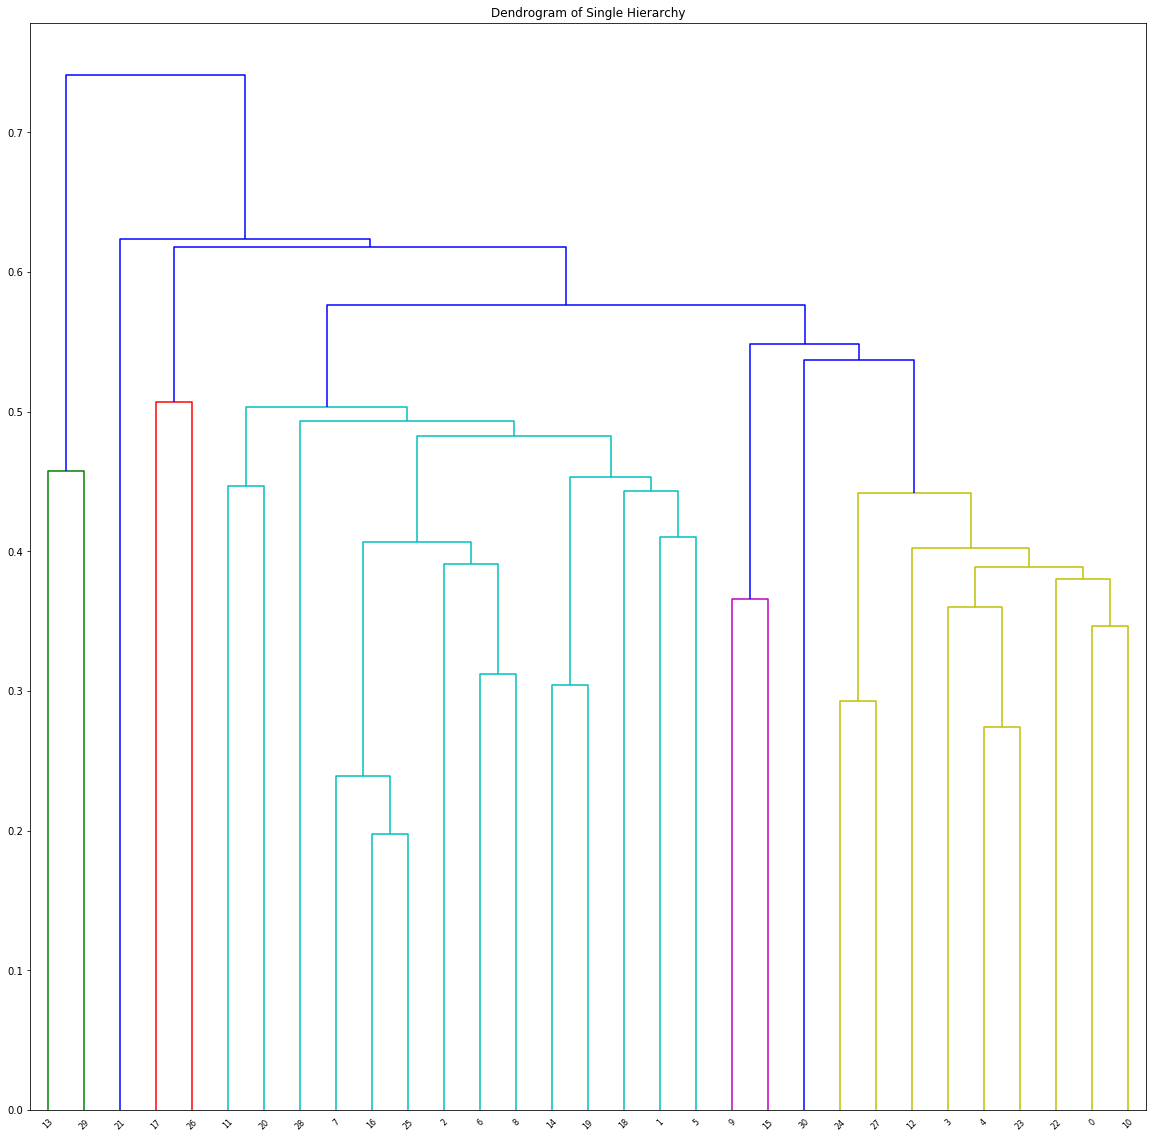

In [28]:
# single hierarchy
data_hierarchy=data_transform[['PC1','PC2','PC3','PC4','PC5','PC6']]
single_dendro=linkage(data_hierarchy,method='single')
plt.figure(figsize=(20,20))
dendrogram(single_dendro)
plt.title("Dendrogram of Single Hierarchy")
plt.show()

In [29]:
single_cluster=cut_tree(single_dendro,n_clusters=3).reshape(-1,)
data_transform['Cluster_ID_single']=single_cluster

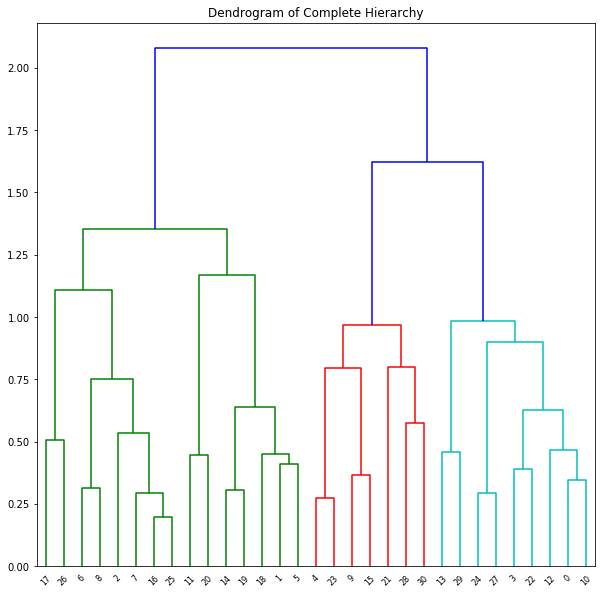

In [30]:
# complete hierarchy
data_hierarchial_complete=data_transform[['PC1','PC2','PC3','PC4','PC5','PC6']]
complete_dendro=linkage(data_hierarchial_complete,method='complete')
plt.figure(figsize=(10,10))
dendrogram(complete_dendro)
plt.title("Dendrogram of Complete Hierarchy")
plt.show()

In [31]:
complete_cluster=cut_tree(complete_dendro,n_clusters=3).reshape(-1,)
data_transform['Cluster_ID_complete']=complete_cluster
data_transform['country']=data_country
data_transform

,PC1,PC2,PC3,PC4,PC5,PC6,Cluster_ID_Kmeans,Cluster_ID_single,Cluster_ID_complete,country
0,-0.852587,0.188613,-0.053452,0.113566,-0.026623,-0.075594,1,0,0,Armenia
1,0.470211,0.511391,-0.414311,0.055953,0.032193,0.031826,0,0,1,Bangladesh
2,1.091542,-0.360293,-0.025921,0.220860,0.076032,0.066458,2,0,1,Benin
3,-0.494066,0.083628,-0.000140,0.027376,0.218680,0.064749,1,0,0,Bhutan
4,-0.160497,0.213103,0.077168,0.108022,0.099354,0.125238,0,0,2,Bolivia
5,0.415610,0.150524,-0.407721,-0.062516,0.171156,-0.010996,0,0,1,Cambodia
6,0.913497,-0.492076,0.136249,0.148411,0.041003,-0.199760,2,0,1,Cameroon
7,0.875223,-0.093551,-0.137323,0.124483,-0.033939,0.182830,2,0,1,Comoros
8,0.887182,-0.457081,0.362600,-0.033897,0.131165,-0.144437,2,0,1,Cote d'Ivoire
9,-0.488711,0.281045,0.218691,0.424787,-0.082969,-0.130652,1,0,2,Egypt


In [32]:
# adding cluster_ID_x columns to 'data' dataframe
data_final=pd.merge(data,data_transform[['Cluster_ID_Kmeans','Cluster_ID_single','Cluster_ID_complete','country']],on='country')
data_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID_Kmeans,Cluster_ID_single,Cluster_ID_complete
0,Armenia,0.009595,0.380551,0.585134,0.577574,0.626036,0.382182,0.955056,0.102689,0.881805,1,0,0
1,Bangladesh,0.343284,0.000000,0.000000,0.000000,0.121893,0.347211,0.792135,0.259169,0.000000,0,0,1
2,Benin,1.000000,0.041022,0.022370,0.052127,0.048521,0.000000,0.308989,1.000000,0.000000,2,0,1
3,Bhutan,0.271855,0.558684,0.441036,0.614459,0.592899,0.283375,0.887640,0.271394,0.509312,1,0,0
4,Bolivia,0.313433,0.481849,0.351851,0.229480,0.473373,0.438246,0.859551,0.471883,0.437679,0,0,2
5,Cambodia,0.289979,0.210886,0.091400,0.135048,0.131361,0.124063,0.550562,0.393643,0.010029,0,0,1
6,Cameroon,0.968017,0.117632,0.206181,0.084155,0.147929,0.056897,0.056180,0.938875,0.197708,2,0,1
7,Comoros,0.756930,0.003889,0.040707,0.103746,0.000000,0.165695,0.539326,0.850856,0.003940,2,0,1
8,Cote d'Ivoire,1.000000,0.344166,0.193241,0.162104,0.151479,0.250069,0.000000,0.977995,0.165473,2,0,1
9,Egypt,0.126866,0.300094,0.480724,0.235044,1.000000,0.511518,0.797753,0.469438,0.659742,1,0,2


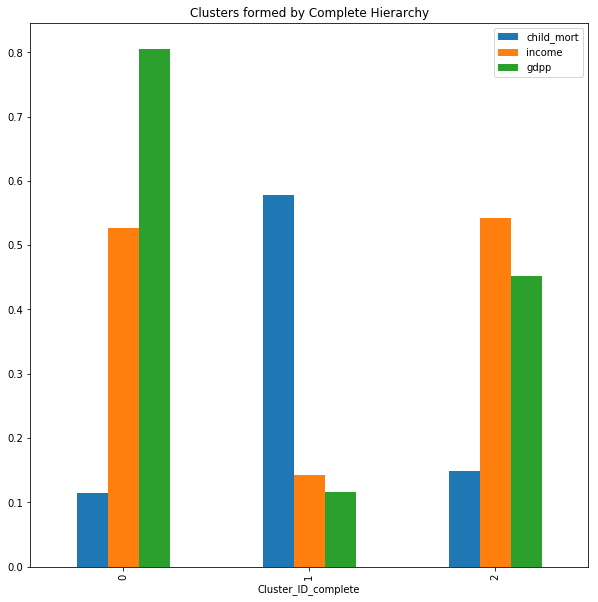

In [33]:
# Analyse the clusters for each kind of clustering technique, and identify the ones which are in dire need of aid

# Using hierarchical complete method
data_final_segment=data_final[['country','child_mort','income','gdpp','Cluster_ID_complete']]
data_final_segment.groupby('Cluster_ID_complete').mean().plot(kind='bar', figsize=(10,10))
plt.title('Clusters formed by Complete Hierarchy')
plt.show()

In [34]:
# The countries belonging to cluster_ID=1 have high child_mort, low income and low gdpp. These countries are the ones which 
# need the aid.

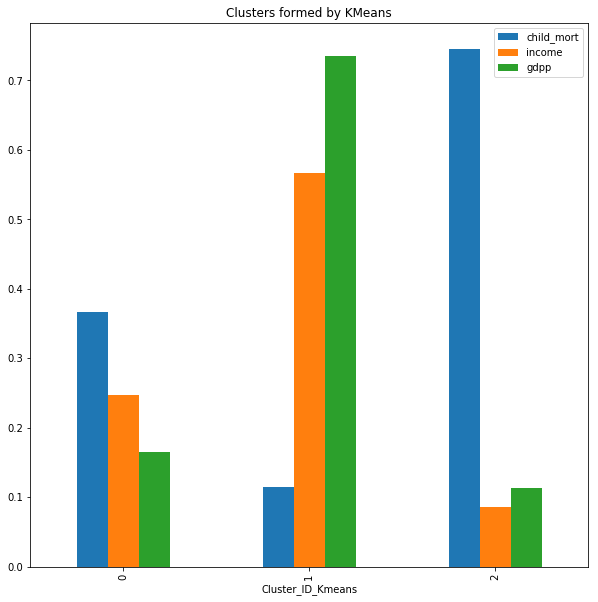

In [35]:
# Using Kmeans cluster ID to identify the countries that need aid
data_final_segment=data_final[['country','child_mort','income','gdpp','Cluster_ID_Kmeans']]
data_final_segment.groupby('Cluster_ID_Kmeans').mean().plot(kind='bar', figsize=(10,10))
plt.title('Clusters formed by KMeans')
plt.show()

In [36]:
# From the above graph, countries belonging to cluster 0 and 2, are in need of aid

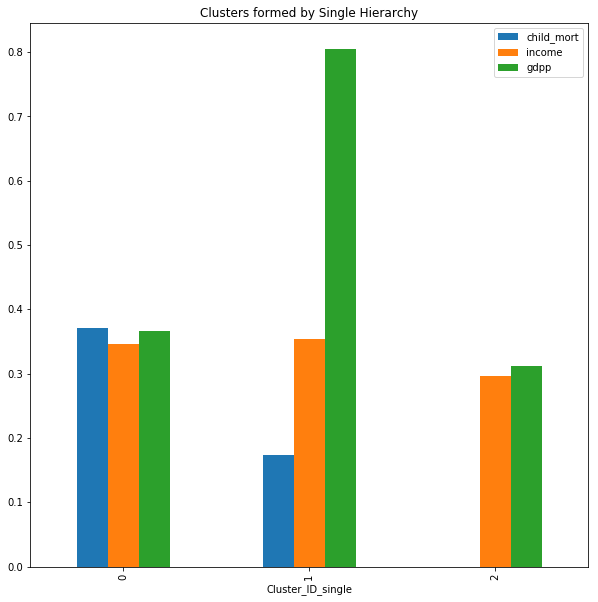

In [37]:
# Using hierarchical single clustering method to identify countries in need of aid
data_final_segment=data_final[['country','child_mort','income','gdpp','Cluster_ID_single']]
data_final_segment.groupby('Cluster_ID_single').mean().plot(kind='bar', figsize=(10,10))
plt.title('Clusters formed by Single Hierarchy')
plt.show()

In [38]:
# From the above graph, the countries in cluster 0 are in dire need of aid.

In [39]:
# Choosing clusters formed using KMeans method 
data_final.drop(['Cluster_ID_complete','Cluster_ID_single'],axis=1,inplace=True)
data_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID_Kmeans
0,Armenia,0.009595,0.380551,0.585134,0.577574,0.626036,0.382182,0.955056,0.102689,0.881805,1
1,Bangladesh,0.343284,0.000000,0.000000,0.000000,0.121893,0.347211,0.792135,0.259169,0.000000,0
2,Benin,1.000000,0.041022,0.022370,0.052127,0.048521,0.000000,0.308989,1.000000,0.000000,2
3,Bhutan,0.271855,0.558684,0.441036,0.614459,0.592899,0.283375,0.887640,0.271394,0.509312,1
4,Bolivia,0.313433,0.481849,0.351851,0.229480,0.473373,0.438246,0.859551,0.471883,0.437679,0
5,Cambodia,0.289979,0.210886,0.091400,0.135048,0.131361,0.124063,0.550562,0.393643,0.010029,0
6,Cameroon,0.968017,0.117632,0.206181,0.084155,0.147929,0.056897,0.056180,0.938875,0.197708,2
7,Comoros,0.756930,0.003889,0.040707,0.103746,0.000000,0.165695,0.539326,0.850856,0.003940,2
8,Cote d'Ivoire,1.000000,0.344166,0.193241,0.162104,0.151479,0.250069,0.000000,0.977995,0.165473,2
9,Egypt,0.126866,0.300094,0.480724,0.235044,1.000000,0.511518,0.797753,0.469438,0.659742,1


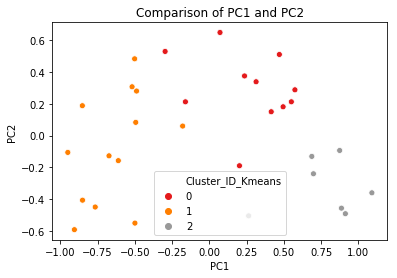

In [40]:
#  Perform visualisation on the clusters that have been formed for the first two Principal Components
sns.scatterplot(x='PC1',y='PC2',hue='Cluster_ID_Kmeans',data=data_transform,palette="Set1",legend='full')
plt.title("Comparison of PC1 and PC2")
plt.show()

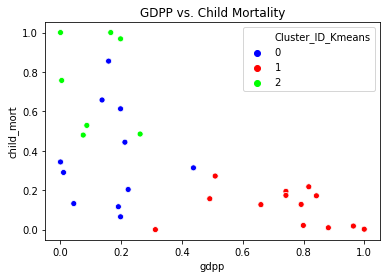

In [41]:
# Perform visualisation using any two of the original variables (like gdpp, child_mort, etc.)
sns.scatterplot(x='gdpp',y='child_mort',hue='Cluster_ID_Kmeans',data=data_final, palette='brg')
plt.title('GDPP vs. Child Mortality')
plt.show()

In [42]:
# For countries having low gdpp, ~0.4 and less, the child mortality rate is higher for clusters 0 and 2, mainly cluster 2.
# Whereas, for cluster 1, high gdpp countries belong to this cluster and has low child mortality rates

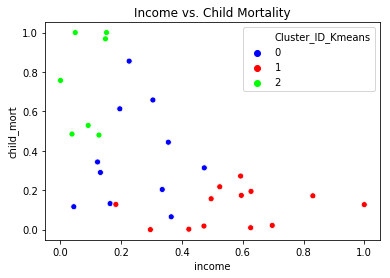

In [43]:
sns.scatterplot(x='income',y='child_mort',hue='Cluster_ID_Kmeans',data=data_final,palette='brg')
plt.title("Income vs. Child Mortality")
plt.show()

In [44]:
# For countries having low income, ~0.4 and less, the child mortality rate is higher for clusters 0 and 2, mainly cluster 2.
# Whereas, for cluster 1, high income countries belong to this cluster and has low child mortality rates

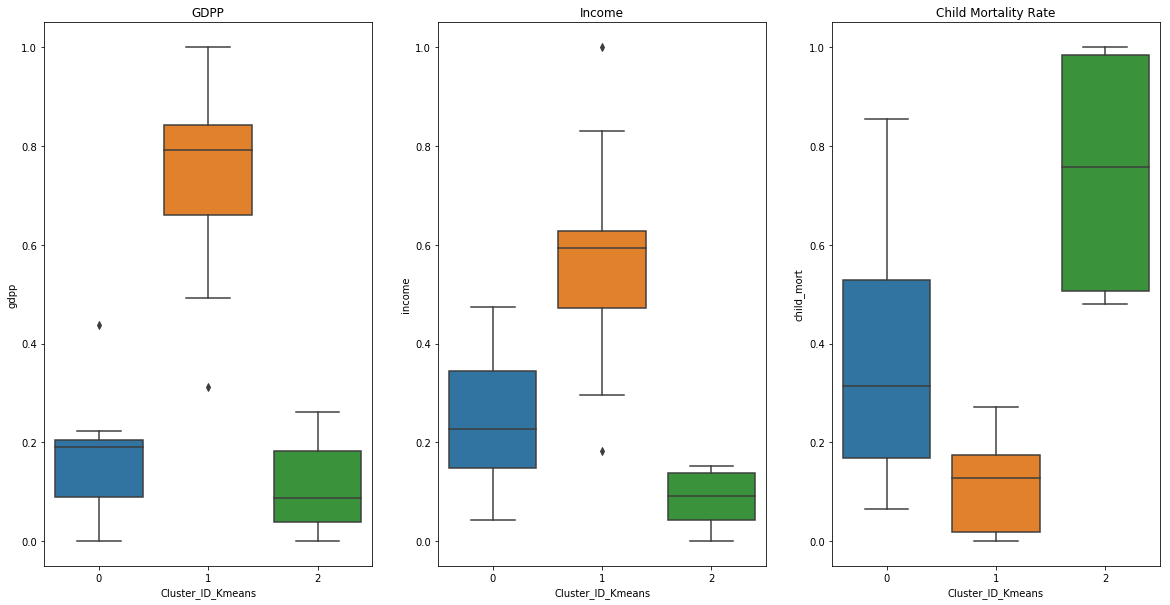

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(x='Cluster_ID_Kmeans',y='gdpp',data=data_final)
plt.title("GDPP")

plt.subplot(1,3,2)
sns.boxplot(x='Cluster_ID_Kmeans',y='income',data=data_final)
plt.title('Income')

plt.subplot(1,3,3)
sns.boxplot(x='Cluster_ID_Kmeans',y='child_mort',data=data_final)
plt.title("Child Mortality Rate")
plt.show()

In [46]:
# Comparing the boxplots, it can be clearly seen that the countries belonging to cluster 2 are not performing well, as 
# compared to the remaining countries in terms of GDPP, Income and Child Mortality

In [47]:
# Printing out those countries belonging to cluster 1
print("Countries belonging to Cluster 2 are: ",end='')
countries=data_final.country.loc[data_final['Cluster_ID_Kmeans']==2]
print(list(countries))

Countries belonging to Cluster 2 are: ['Benin', 'Cameroon', 'Comoros', "Cote d'Ivoire", 'Kenya', 'Kiribati', 'Senegal']
